In [177]:
import data
from string import ascii_lowercase
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Tablet:
    def __init__(self, instructions):
        self.register_keys = ascii_lowercase[:8]
        self.registers = {s: 0 for s in self.register_keys}
        self.pos = 0
        self.muls = 0
        self.iter = 1

        self.parse(instructions)
        
    def parse(self, instructions):
        self.instructions = [tuple(instruction.split(' ')) for instruction in instructions.split('\n')]
    
    def run(self, limit=float('inf')):
        while self.iter < limit:
            if self.process() == 'done':
                break
            
    def process(self):
        if self.pos < 0 or self.pos >= len(self.instructions):
            return 'done';
        
        line = self.instructions[self.pos]
#         print(' '.join(line))
        op = line[0]
        
        # Get the argument and it's value 
        arg1, arg1_val = self.get(line[1])
        arg2, arg2_val = self.get(line[2])
        
        self.instruct(line, op, arg1, arg1_val, arg2, arg2_val)
        
    def instruct(self, line, op, arg1, arg1_val, arg2, arg2_val):
        self.iter += 1
        if op == 'set':
            self.set(arg1, arg2_val)
        elif op == 'sub':
            self.set(arg1, arg1_val - arg2_val)
        elif op == 'mul':
            self.set(arg1, arg1_val * arg2_val)
            self.muls += 1
        elif op == 'jnz':
            if arg1_val != 0:
                self.pos += arg2_val
                return 
        self.pos += 1
    
    def get(self, register):
        if is_numeric(register):
            return None, int(register)
        
        if register not in self.registers:
            self.registers[register] = 0
            
        return register, self.registers[register]
    
    def set(self, register, val):
        self.registers[register] = val
        
    def __str__(self):
        keys = list(self.registers.keys())
        keys.sort()
        s = ''
        for k in keys:
            s += k + ': ' + str(self.registers[k]) + '\n'
        return s

def is_numeric(string):
    try:
        int(string)
        return True
    except ValueError:
        return False
        
        
t = Tablet(data.data)
t.run()

assert t.muls == 3025

# 2 ways of plotting whats going on 
- index of instruction against iteration
- register values as they change 

{'e': 0, 'a': 1, 'f': 0, 'g': 0, 'c': 57, 'b': 57, 'h': 0, 'd': 0}
{'e': 2, 'a': 1, 'f': 1, 'g': -105696, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 3, 'a': 1, 'f': 1, 'g': -105697, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 3, 'a': 1, 'f': 1, 'g': -105694, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 4, 'a': 1, 'f': 1, 'g': -105696, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 4, 'a': 1, 'f': 1, 'g': -105692, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 5, 'a': 1, 'f': 1, 'g': -105695, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 5, 'a': 1, 'f': 1, 'g': -105690, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 6, 'a': 1, 'f': 1, 'g': -105694, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 6, 'a': 1, 'f': 1, 'g': -105688, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 7, 'a': 1, 'f': 1, 'g': -105693, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 7, 'a': 1, 'f': 1, 'g': -105686, 'c': 122700, 'b': 105700, 'h': 0, 'd': 2}
{'e': 8, 'a': 1, 'f': 1, 'g': -105692, 'c'

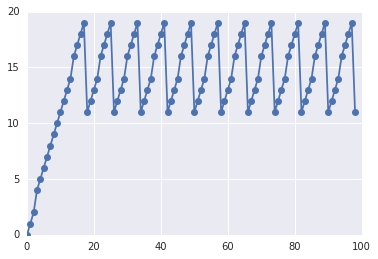

In [208]:
d2 = '''set b 57
set c b
jnz a 2
jnz 1 5
mul b 100
sub b -100000
set c b
sub c -17000
set f 1
set d 2
set e 2
set g d
mul g e
sub g b
jnz g 2
set f 0
sub e -1
set g e
sub g b
jnz g -8
sub d -1
set g d
sub g b
jnz g -13
jnz f 2
sub h -1
set g b
sub g c
jnz g 2
jnz 1 3
sub b -17
jnz 1 -23'''

class Tablet_2(Tablet):
    def __init__(self, instructions):
        Tablet.__init__(self, instructions)
        self.h1 = {k:[] for k in self.register_keys}
        self.h1['jnz'] = []
        self.h2 = []
        
    def instruct(self, line, op, arg1, arg1_val, arg2, arg2_val):
        info = [self.pos]
        oldpos = self.pos + 0            
        Tablet.instruct(self, line, op, arg1, arg1_val, arg2, arg2_val)
        if op == 'jnz':
            print(self.registers)
            self.h1['jnz'].append(info)
        else:
            info.append(self.registers[arg1])
            self.h1[arg1].append(info)
        t.h2.append(oldpos)
         

    def get_state(self):
        state = [self.pos]
        state.extend([self.registers[k] for k in self.register_keys])
        return state

# # Sanity check
# t = Tablet_2(d2)
# t.run()
# assert t.muls == 3025

# Real data
t = Tablet_2(d2)
t.registers['a'] = 1
# t.registers = {'a': 1, 'b': 105700, 'c': 122700, 'd': 2, 'e': 105700, 'f': 0, 'g': 0, 'h': 0}
t.run(100)

plt.plot(t.h2, 'o-')
print(t)
# h = np.array(t.history)
# for k in t.register_keys:
#     plt.plot(h[:, 1:])
# plt.legend(t.register_keys)

In [182]:
# With help from here: https://github.com/dp1/AoC17/blob/master/day23.5.txt

data = '''
set f 1
set d 2
    set e 2
        set g d
        mul g e
        sub g b
            jnz g 2
            set f 0
        sub e -1
        set g e
        sub g b
        jnz g -8
    sub d -1
    set g d
    sub g b
    jnz g -13

jnz f 2
sub h -1

set g b
sub g c

jnz g 2
jnz 1 3

sub b -17
jnz 1 -23'''


{'a': 1,
 'b': 105700,
 'c': 122700,
 'd': 3,
 'e': 3,
 'f': 0,
 'g': -105697,
 'h': 0}

In [200]:
f, d = 1, 2
    e = 2
        if d * e - b == 0:
            f = 0
        e += 1
        if e - b != 0:
            loop
    d -= 1
    g = d - b 
    if g != 0:
        loop
    
if f == 0:
    h += 1

122700 105700


In [218]:
h = 0

def is_prime(n):
    if n==2 or n==3: return True
    if n%2==0 or n<2: return False
    for i in range(3,int(n**0.5)+1,2):   # only odd numbers
        if n%i==0:
            return False    

    return True
for b in range(105700, 122700+1, 17):
    if not is_prime(b):
        h += 1
print(h)

915


In [211]:
h

0

In [209]:
31-23

8